<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Waterfall_Streams_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Waterfall Streams

You're given a two-dimensional array that represents the structure of an indoor waterfall and a positive integer that represents the column that the waterfall's water source will start at. More specifically, the water source will start directly above the structure and will flow downwards.

Each row in the array contains `0`s and `1`s, where a `0` represents a free space and a `1` represents a block that water can't pass through. You can imagine that the last row of the array contains buckets that the water will eventually flow into; thus, the last row of the array will always contain only `0`s. You can also imagine that there are walls on both sides of the structure, meaning that water will never leave the structure; it will either be trapped against a wall or flow into one of the buckets in the last row.

As water flows downwards, if it hits a block, it splits evenly to the left and right-hand side of that block. In other words, 50% of the water flows left and 50% of it flows right. If a water stream is unable to flow to the left or to the right (because of a block or a wall), the water stream in question becomes trapped and can no longer continue to flow in that direction; it effectively gets stuck in the structure and can no longer flow downwards, meaning that 50% of the previous water stream is forever lost.

Lastly, the input array will always contain at least two rows and one column, and the space directly below the water source (in the first row of the array) will always be empty, allowing the water to start flowing downwards.

Write a function that returns the percentage of water inside each of the bottom buckets after the water has flowed through the entire structure.

You can refer to the first 4.5 minutes of this question's video explanation for a visual example.

Sample Input

```
array = [
  [0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 1, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [1, 1, 1, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0],
]
source = 3
```



Sample Output

```
[0, 0, 0, 25, 25, 0, 0]

// The water will flow as follows:
// [
//   [0, 0, 0, ., 0, 0, 0],
//   [1, ., ., ., ., ., 0],
//   [0, ., 1, 1, 1, ., 0],
//   [., ., ., ., ., ., .],
//   [1, 1, 1, ., ., 1, 0],
//   [0, 0, 0, ., ., 0, 1],
//   [0, 0, 0, ., ., 0, 0],
// ]
```



In [1]:
# Time O(w^2 * h)
# Space O(w)
# w = width
# h = height

def waterfallStreams(array, source):
  water_in_buckets = [0 for _ in range(len(array[0]))]
  # init fringe
  # node = [row, col, water_amount, direction]
  fringe = [[0, source, 100, 'down']]
  while True:
    # is fringe empty
    if len(fringe) == 0:
      return  water_in_buckets

    # pop front
    front = fringe.pop()
    front_row, front_col, front_water_amount, front_direction = front

    # is goal
    if front_row == len(array) - 1:
      water_in_buckets[front_col] += front_water_amount
      continue

    # gen/insert successor
    successors = get_successor(array, front_row, front_col, front_water_amount, front_direction)
    fringe = fringe + successors


def get_successor(array, row, col, water_amount, direction):
  successors = []
  if array[row + 1][col] == 0:
    successors.append([row + 1, col, water_amount, 'down'])

  elif direction == 'down':
    if col != 0 and array[row][col - 1] == 0:
      successors.append([row, col - 1, water_amount / 2, 'left'])
    if col != len(array[0]) - 1 and array[row][col + 1] == 0:
      successors.append([row, col + 1, water_amount / 2, 'right'])
    
  elif direction == 'left':
    if col != 0 and array[row][col - 1] == 0:
      successors.append([row, col - 1, water_amount, 'left'])
    
  elif direction == 'right':
      if col != len(array[0]) - 1 and array[row][col + 1] == 0:
        successors.append([row, col + 1, water_amount, 'right'])

  return successors

In [2]:
array = [
  [0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 1, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [1, 1, 1, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0],
]
source = 3
waterfallStreams(array, source)

[0, 0, 0, 25.0, 25.0, 0, 0]

In [3]:
array = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  ]
source = 8
waterfallStreams(array, source)

[25.0, 0, 12.5, 0, 4.6875, 0, 0, 0, 0, 7.8125, 0, 0, 3.125, 37.5]

# Conceptual Note

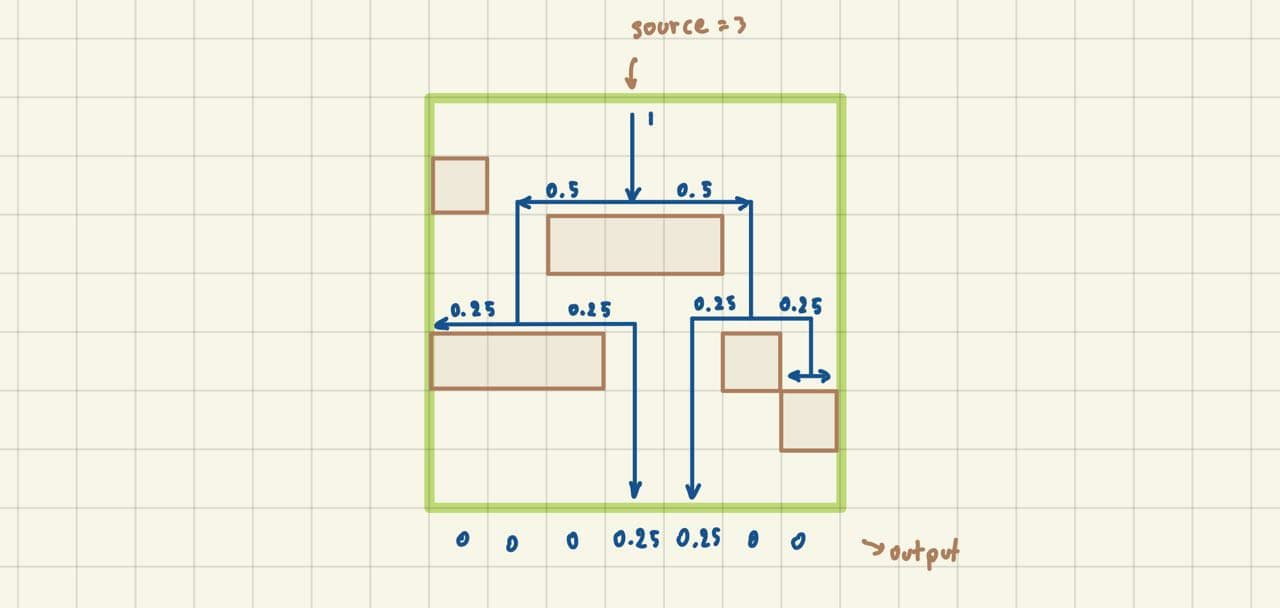